Adding necessary libraries and models

In [408]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Creating data set (I'm working with copy of it in order not to lose original data.)

In [409]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


I'm looking if there is any null value.(Nope)

In [410]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [412]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Above code block can show just numeric values. That's why there are not other values like sex, smoker and region.

**EXPLORATORY DATA ANALYSIS**

BMI Distribution

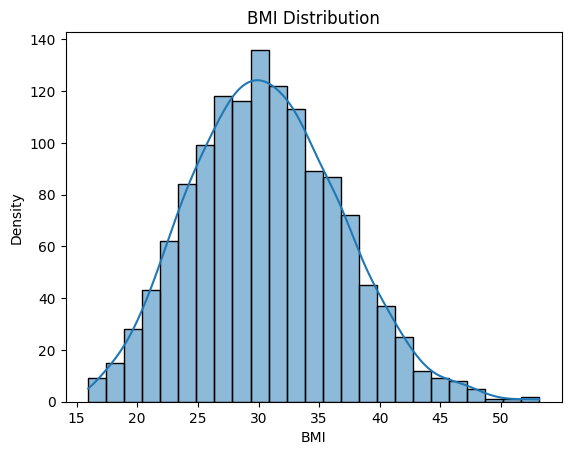

In [413]:
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

Bmi values are between 15 and 53.

Relationship between “smoker” and “charges”

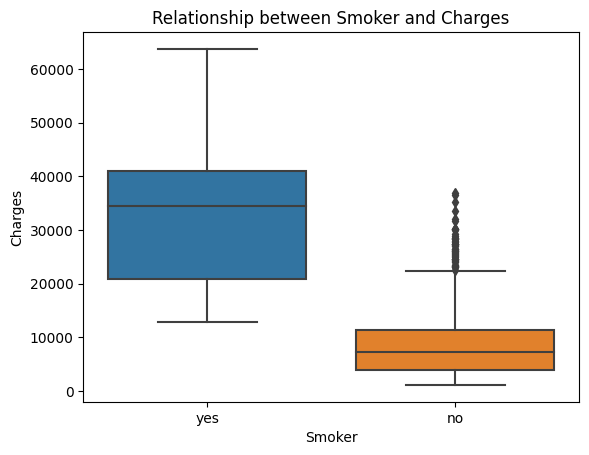

In [414]:
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Relationship between Smoker and Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

Smoking increases health costs.(That's clear)

 Relationship between “smoker” and “region”

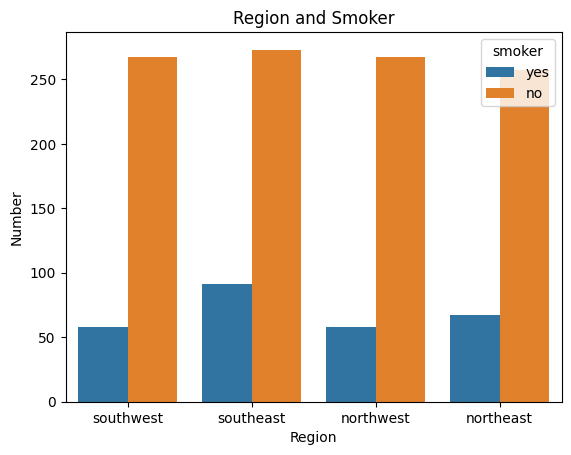

In [415]:
sns.countplot(data=df, x='region', hue='smoker')
plt.xlabel("Region")
plt.ylabel("Number")
plt.title("Region and Smoker")
plt.show()

The rate of smoking in the Southeast is higher than in other regions.

 Relationship between “bmi” and “sex”

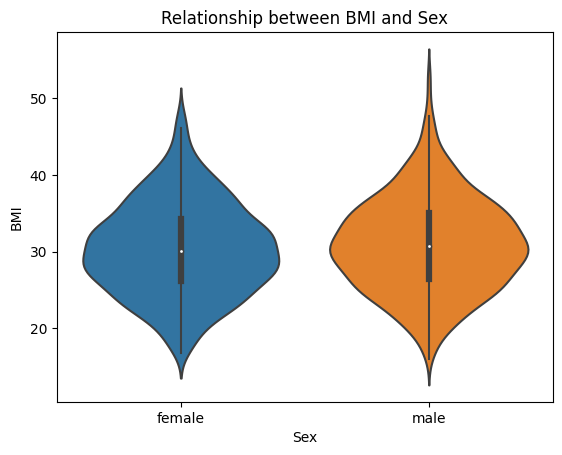

In [416]:
sns.violinplot(data=df, x="sex", y="bmi")
plt.title("Relationship between BMI and Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()

Their rates are similar.

Finding region with most children

In [417]:
children_by_region = df.groupby("region")["children"].sum()
children_by_region

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

In [418]:
# Find the region with the most children
most_children_region = children_by_region.idxmax()
most_children_count = children_by_region.max()

print(f"The region with the most children is {most_children_region} with {most_children_count} children.")

The region with the most children is southeast with 382 children.


Southeast health costs were high. I thought it was related to smoking. Also, the number of children may also have an effect.

Relationship between “age” and “bmi”

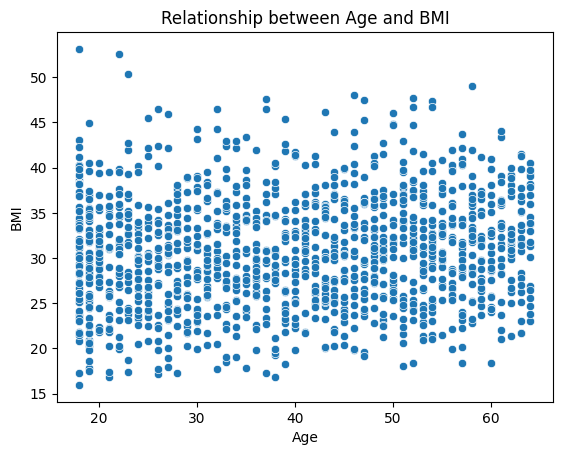

In [419]:
sns.scatterplot(data=df, x="age", y="bmi")
plt.title("Relationship between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

I think, it's difficult to infer. I tried a lot of charts. That's the most suitable one.

Relationship between “bmi” and “children”

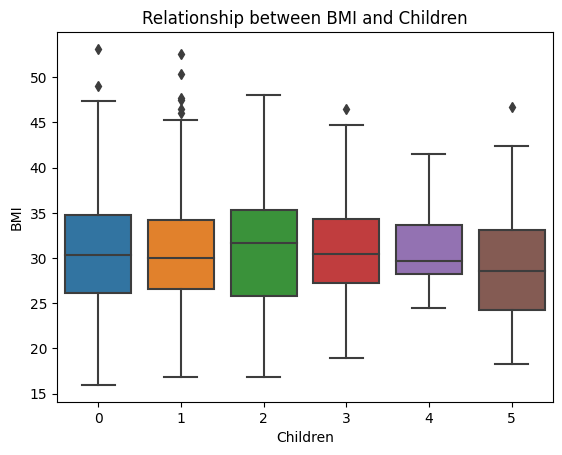

In [420]:
sns.boxplot(data=df, x="children", y="bmi")
plt.title("Relationship between BMI and Children")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()

I'm looking if there is any outlier data for bmi



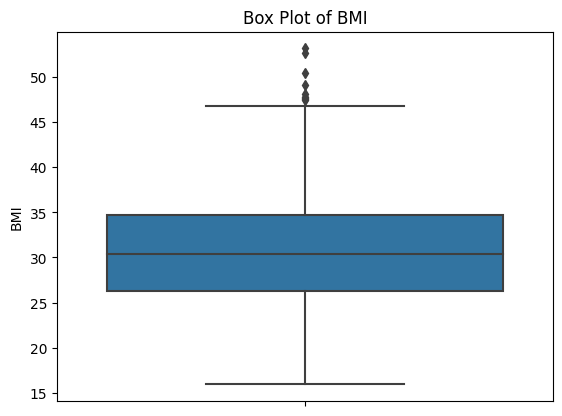

In [421]:
sns.boxplot(data=df, y="bmi")
plt.title("Box Plot of BMI")
plt.ylabel("BMI")
plt.show()

In [422]:
from scipy import stats

z_scores = stats.zscore(df["bmi"])
threshold = 3

outliers = df[abs(z_scores) > threshold]

print("Outliers in BMI:")
print(outliers)

Outliers in BMI:
      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627


These values can be outlier. Especially for 847 and 1317, they are young and bmi values exceeds ideal range. They do not smoke and number of children 0 or 1. But why are these charges so high?


The relationship between “bmi” and “charges”.

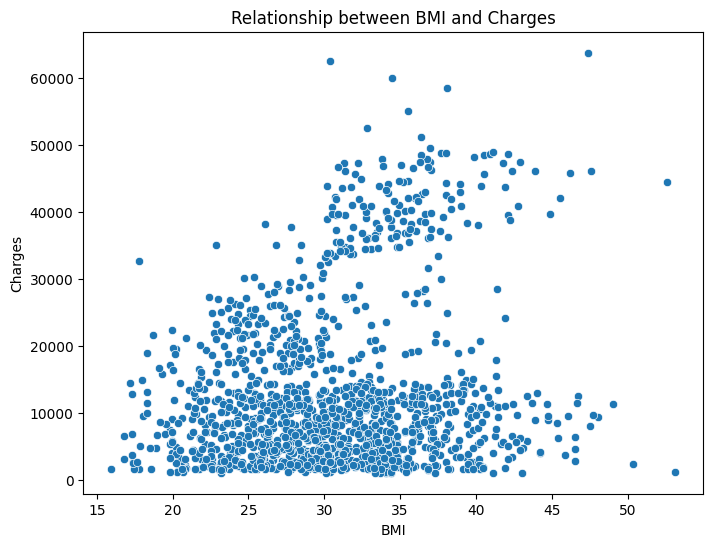

In [423]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="bmi", y="charges")
plt.title("Relationship between BMI and Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

There is density in average bmi and low charge values.

 The relationship between “region”, “smoker” and “bmi” (using bar plot)

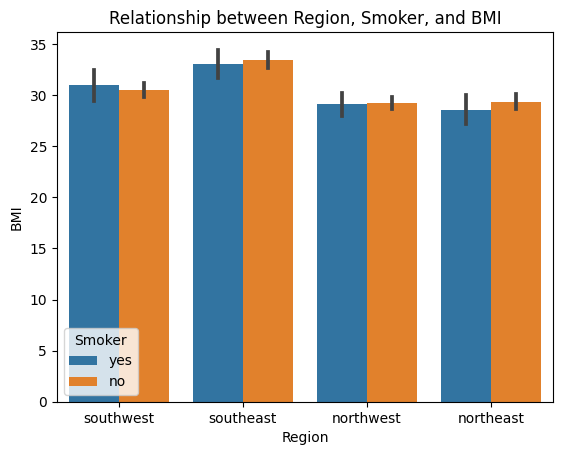

In [424]:

sns.barplot(data=df, x="region", y="bmi", hue="smoker")
plt.title("Relationship between Region, Smoker, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()

Southeast bmi values are also high.

DATA PREPROCESSING

I used label encoding and one-hot encoding

In [425]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

data = pd.get_dummies(df, columns=['region'], drop_first=True)


In [426]:
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [427]:
X

,age,sex,bmi,children,smoker,region_1,region_2,region_3
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [428]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Scaling Process

In [429]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

I'm looking which model is more accurate

In [430]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor())
]

for name, model in models:
    # Cross validation with 5 folds
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)

    print(f"{name}: Mean RMSE = {rmse_scores.mean()}")


Linear Regression: Mean RMSE = 6142.849521345331
Decision Tree Regressor: Mean RMSE = 6584.150240897693
Random Forest Regressor: Mean RMSE = 4889.15919221307


Best performing model is random forest

Hyper Parameter Optimization

In [431]:
param_grid = [
    { "n_estimators": [20, 40, 60, 80, 100], "max_depth": [3, 5, 7, 9, 11] }
]
random_forest_regressor = RandomForestRegressor(random_state=42)
forest_grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
forest_grid_search.fit(X_train_scaled, y_train)
forest_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 100}

Model Evaluation

In [432]:
best_model = forest_grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 17985406.403699547
Mean Absolute Error: 2372.174241921962
R-squared: 0.8763683967000683
